## Aggregate patient information

In [2]:
import pandas as pd

# Load the diagnoses_icd.csv file
df = pd.read_csv("~/Desktop/diagnoses_icd.csv")

# Ensure the icd_code column is treated as a string
df["icd_code"] = df["icd_code"].astype(str)

# Define ICD-10 codes of interest using regular expressions
major_depression_codes = ["F32", "F33"]
bipolar_disorder_codes = ["F25.0", "F30", "F31"]
persistent_mood_disorder_codes = ["F34"]
eating_disorder_codes = ["F50"]
schizophrenia_codes = ["F20"]

In [3]:
# Function to check if an ICD code matches the category
def match_icd(code, categories):
    return any(code.startswith(c) for c in categories)

# Filter the data based on ICD-10 codes
df_filtered = df[df["icd_code"].apply(lambda x: 
    match_icd(x, major_depression_codes) or
    match_icd(x, bipolar_disorder_codes) or
    match_icd(x, persistent_mood_disorder_codes) or
    match_icd(x, eating_disorder_codes) or
    match_icd(x, schizophrenia_codes))
]

# Count the frequency of each diagnosis
diagnosis_counts = df_filtered["icd_code"].value_counts()

# Display results
print(diagnosis_counts)

F329     41876
F319      6870
F32A      4367
F209      2217
F339      1118
         ...  
F3175        1
F3171        1
F3176        1
F348         1
F3011        1
Name: icd_code, Length: 68, dtype: int64


In [4]:
# Ensure the icd_code column is treated as a string
df["icd_code"] = df["icd_code"].astype(str)

# Define ICD-10 codes of interest using their prefixes
icd_categories = {
    "Major Depression": ["F32", "F33"],
    "Bipolar Disorder": ["F25", "F30", "F31"],
    "Persistent Mood Disorder": ["F34"],
    "Eating Disorder": ["F50"],
    "Schizophrenia": ["F20"]
}

# Function to classify ICD codes into categories
def classify_icd(code):
    for category, codes in icd_categories.items():
        if any(code.startswith(c) for c in codes):
            return category
    return None  # Ignore other diagnoses

# Apply classification to filter relevant diagnoses
df["diagnosis_category"] = df["icd_code"].apply(classify_icd)
df_filtered = df.dropna(subset=["diagnosis_category"])  # Keep only relevant diagnoses

# Group by diagnosis category and count occurrences
diagnosis_counts = df_filtered.groupby("diagnosis_category")["icd_code"].count()

# Display results
print(diagnosis_counts)


diagnosis_category
Bipolar Disorder            11101
Eating Disorder              1157
Major Depression            49471
Persistent Mood Disorder      209
Schizophrenia                2984
Name: icd_code, dtype: int64


In [5]:
# Filter for primary diagnoses (seq_num = 1)
df_primary = df[df["seq_num"] == 1]
df_primary["icd_code"] = df_primary["icd_code"].astype(str)

# Apply classification to filter relevant diagnoses
df_primary["diagnosis_category"] = df_primary["icd_code"].apply(classify_icd)
df_primary_filtered = df_primary.dropna(subset=["diagnosis_category"])  # Keep only relevant diagnoses

# Group by diagnosis category and count occurrences
primary_diagnosis_counts = df_primary_filtered.groupby("diagnosis_category")["icd_code"].count()

# Display results
print(primary_diagnosis_counts)


/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/2299711856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primary["icd_code"] = df_primary["icd_code"].astype(str)


diagnosis_category
Bipolar Disorder            2572
Eating Disorder              213
Major Depression            5455
Persistent Mood Disorder      16
Schizophrenia                855
Name: icd_code, dtype: int64


/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/2299711856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primary["diagnosis_category"] = df_primary["icd_code"].apply(classify_icd)


In [6]:
df_primary_filtered.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category
1697,10002315,22798410,1,F329,10,Major Depression
5307,10006630,27341635,1,F329,10,Major Depression
5549,10007218,27767127,1,F329,10,Major Depression
5551,10007218,28348073,1,F329,10,Major Depression
5558,10007266,27967951,1,F332,10,Major Depression


In [7]:
import pandas as pd

# Load the patients.csv file to get anchor year group
patients_df = pd.read_csv("~/Desktop/patients.csv")

# Merge with primary diagnosis data
df_primary_filtered = df_primary_filtered.merge(patients_df, on="subject_id", how="left")

# Group by anchor_year_group and diagnosis_category, then count occurrences
anchor_year_summary = df_primary_filtered.groupby(["anchor_year_group", "diagnosis_category"])["icd_code"].count().reset_index()

# Rename columns for clarity
anchor_year_summary.rename(columns={"icd_code": "count"}, inplace=True)

# Display results
print(anchor_year_summary)


   anchor_year_group        diagnosis_category  count
0        2008 - 2010          Bipolar Disorder    562
1        2008 - 2010           Eating Disorder     26
2        2008 - 2010          Major Depression    744
3        2008 - 2010  Persistent Mood Disorder      6
4        2008 - 2010             Schizophrenia    189
5        2011 - 2013          Bipolar Disorder    340
6        2011 - 2013           Eating Disorder     36
7        2011 - 2013          Major Depression    514
8        2011 - 2013             Schizophrenia    106
9        2014 - 2016          Bipolar Disorder    509
10       2014 - 2016           Eating Disorder     47
11       2014 - 2016          Major Depression   1366
12       2014 - 2016  Persistent Mood Disorder      2
13       2014 - 2016             Schizophrenia    164
14       2017 - 2019          Bipolar Disorder    670
15       2017 - 2019           Eating Disorder     45
16       2017 - 2019          Major Depression   2020
17       2017 - 2019  Persis

In [8]:
df_primary_filtered.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10002315,22798410,1,F329,10,Major Depression,M,27,2161,2017 - 2019,NaN
1,10006630,27341635,1,F329,10,Major Depression,F,21,2176,2014 - 2016,NaN
2,10007218,27767127,1,F329,10,Major Depression,F,24,2113,2017 - 2019,NaN
3,10007218,28348073,1,F329,10,Major Depression,F,24,2113,2017 - 2019,NaN
4,10007266,27967951,1,F332,10,Major Depression,F,55,2189,2017 - 2019,NaN


In [9]:
# Load discharge_detail.csv (assuming it contains subject_id and discharge notes)
discharge_df = pd.read_csv("~/Desktop/discharge_detail.csv")[["subject_id", "note_id"]]

# Aggregate: Count number of notes per subject
discharge_counts = discharge_df.groupby("subject_id")["note_id"].count().reset_index()
discharge_counts.rename(columns={"note_id": "note_count"}, inplace=True)

discharge_counts.head()


,subject_id,note_count
0,10000032,4
1,10000084,1
2,10000117,2
3,10000248,1
4,10000560,1


In [10]:
# Merge with df_primary_filtered to get relevant diagnoses and discharge note counts
df_merged = df_primary_filtered.merge(discharge_counts, on="subject_id", how="left")

# Count unique patients per diagnosis category who have at least one discharge note
note_summary = (
    df_merged.dropna(subset=["note_count"])  # Keep only patients with discharge notes
    .groupby(["anchor_year_group", "diagnosis_category"])["subject_id"]
    .nunique()
    .reset_index()
)

# Rename columns for clarity
note_summary.rename(columns={"subject_id": "patient_count"}, inplace=True)

# Display results
print(note_summary)

   anchor_year_group        diagnosis_category  patient_count
0        2008 - 2010          Bipolar Disorder            112
1        2008 - 2010           Eating Disorder              8
2        2008 - 2010          Major Depression            203
3        2008 - 2010  Persistent Mood Disorder              3
4        2008 - 2010             Schizophrenia             34
5        2011 - 2013          Bipolar Disorder             59
6        2011 - 2013           Eating Disorder              4
7        2011 - 2013          Major Depression            116
8        2011 - 2013             Schizophrenia             18
9        2014 - 2016          Bipolar Disorder            117
10       2014 - 2016           Eating Disorder             10
11       2014 - 2016          Major Depression            274
12       2014 - 2016             Schizophrenia             38
13       2017 - 2019          Bipolar Disorder            127
14       2017 - 2019           Eating Disorder             11
15      

## Add clinical note to the data frame

In [11]:
# Load the discharge notes dataset
discharge_notes_df = pd.read_csv(
    "/Users/lifuchen/physionet.org/files/mimic-iv-note/2.2/note/discharge.csv.gz",
    compression="gzip"
)

# # Ensure correct column names (assuming columns include 'subject_id', 'hadm_id', and 'text')
# discharge_notes_df = discharge_notes_df[["subject_id", "hadm_id", "text"]]

# Merge with df_primary_filtered on both subject_id and hadm_id
df_merged = df_primary_filtered.merge(discharge_notes_df, on=["subject_id", "hadm_id"], how="left")

# Display a preview of the merged dataset
print(df_merged.head())


   subject_id   hadm_id  seq_num icd_code  icd_version diagnosis_category  \
0    10002315  22798410        1     F329           10   Major Depression   
1    10006630  27341635        1     F329           10   Major Depression   
2    10007218  27767127        1     F329           10   Major Depression   
3    10007218  28348073        1     F329           10   Major Depression   
4    10007266  27967951        1     F332           10   Major Depression   

  gender  anchor_age  anchor_year anchor_year_group  dod note_id note_type  \
0      M          27         2161       2017 - 2019  NaN     NaN       NaN   
1      F          21         2176       2014 - 2016  NaN     NaN       NaN   
2      F          24         2113       2017 - 2019  NaN     NaN       NaN   
3      F          24         2113       2017 - 2019  NaN     NaN       NaN   
4      F          55         2189       2017 - 2019  NaN     NaN       NaN   

   note_seq charttime storetime text  
0       NaN       NaN       N

In [12]:
# Count unique patients per diagnosis category who have at least one discharge note
note_summary = (
    df_merged.dropna(subset=["note_id"])  # Keep only patients with discharge notes
    .groupby(["anchor_year_group", "diagnosis_category"])["note_id"]
    .nunique()
    .reset_index()
)

# Rename columns for clarity
note_summary.rename(columns={"subject_id": "patient_count"}, inplace=True)

# Display results
print(note_summary)

   anchor_year_group        diagnosis_category  note_id
0        2008 - 2010          Bipolar Disorder      133
1        2008 - 2010           Eating Disorder       16
2        2008 - 2010          Major Depression      117
3        2008 - 2010  Persistent Mood Disorder        1
4        2008 - 2010             Schizophrenia       58
5        2011 - 2013          Bipolar Disorder       96
6        2011 - 2013           Eating Disorder       28
7        2011 - 2013          Major Depression       74
8        2011 - 2013             Schizophrenia       26
9        2014 - 2016          Bipolar Disorder      166
10       2014 - 2016           Eating Disorder       35
11       2014 - 2016          Major Depression      318
12       2014 - 2016  Persistent Mood Disorder        1
13       2014 - 2016             Schizophrenia       64
14       2017 - 2019          Bipolar Disorder      190
15       2017 - 2019           Eating Disorder       28
16       2017 - 2019          Major Depression  

In [13]:
# Get the first clinical note from the DataFrame
note_text = df_merged.dropna(subset=["note_id"])['text'].iloc[0]

# Display the formatted clinical note
print(note_text)


 
Name:  ___                    Unit No:   ___
 
Admission Date:  ___              Discharge Date:   ___
 
Date of Birth:  ___             Sex:   M
 
Service: PSYCHIATRY
 
Allergies: 
pcn / sulfa / phenobarbital / labetalol / ampicillin / 
amoxicillin
 
Attending: ___.
 
Chief Complaint:
"I'm jittery from the risperidone" 
 
Major Surgical or Invasive Procedure:
None
 
History of Present Illness:
Mr. ___ is a ___ year old man with self-reported psychiatric 
history of OCD, anxiety, depression, and somatization disorder, 
recently hospitalized on Deac4 for an unspecified psychotic 
episode that was possibly substance-induced (___), who 
self-presented to the ED due to concerns that his risperidone 
was making him increasingly restless and anxious. Psychiatry was 
consulted for evaluation due to ED resident concern of possible 
SI.
.
Please also see Dr. ___ comprehensive discharge 
summary dated ___ for full details of last Deac4 hospital 
course.  Briefly, at that time patient was hospi

In [14]:
df_merged["note_length"] = df_merged["text"].apply(lambda x: len(str(x)))  # Length in characters

note_length_summary = (
    df_merged.dropna(subset=["note_id"])
    .groupby(["anchor_year_group"])["note_length"]
    .mean()  # Calculate average length of notes
    .round(0)
    .astype(int)
    .reset_index()
)

note_length_summary.rename(columns={"note_length": "average_note_length"}, inplace=True)

print(note_length_summary)


  anchor_year_group  average_note_length
0       2008 - 2010                17773
1       2011 - 2013                16280
2       2014 - 2016                15771
3       2017 - 2019                18096


In [15]:
note_length_summary = (
    df_merged.dropna(subset=["note_id"])
    .groupby(["diagnosis_category"])["note_length"]
    .mean()  # Calculate average length of notes
    .round(0)
    .astype(int)
    .reset_index()
)

note_length_summary.rename(columns={"note_length": "average_note_length"}, inplace=True)

print(note_length_summary)

         diagnosis_category  average_note_length
0          Bipolar Disorder                18052
1           Eating Disorder                12006
2          Major Depression                17013
3  Persistent Mood Disorder                17549
4             Schizophrenia                17165


In [16]:
note_length_summary = (
    df_merged.dropna(subset=["note_id"])
    .groupby(["anchor_year_group","diagnosis_category"])["note_length"]
    .mean()  # Calculate average length of notes
    .round(0)
    .astype(int)
    .reset_index()
)

note_length_summary.rename(columns={"note_length": "average_note_length"}, inplace=True)

print(note_length_summary)

   anchor_year_group        diagnosis_category  average_note_length
0        2008 - 2010          Bipolar Disorder                18577
1        2008 - 2010           Eating Disorder                14830
2        2008 - 2010          Major Depression                17749
3        2008 - 2010  Persistent Mood Disorder                16586
4        2008 - 2010             Schizophrenia                16808
5        2011 - 2013          Bipolar Disorder                17144
6        2011 - 2013           Eating Disorder                12764
7        2011 - 2013          Major Depression                16756
8        2011 - 2013             Schizophrenia                15521
9        2014 - 2016          Bipolar Disorder                16721
10       2014 - 2016           Eating Disorder                12163
11       2014 - 2016          Major Depression                15501
12       2014 - 2016  Persistent Mood Disorder                 9124
13       2014 - 2016             Schizophrenia  

## Filter out patients with multiple notes for future analysis

In [17]:
# Step 1: Filter out rows with missing note_id
df_with_notes = df_merged.dropna(subset=["note_id"])

# Step 2: Count the number of notes per subject_id
note_counts = df_with_notes.groupby("subject_id")["note_id"].count()

# Step 3: Identify patients with more than one note
multiple_note_patients = note_counts[note_counts > 1].index  # Get subject_ids

# Step 4: Create a new DataFrame for these patients
df_multiple_notes = df_with_notes[df_with_notes["subject_id"].isin(multiple_note_patients)]

# Display the new DataFrame
print(df_multiple_notes.head())


     subject_id   hadm_id  seq_num icd_code  icd_version diagnosis_category  \
85     10070024  26398294        1    F3189           10   Bipolar Disorder   
86     10070024  26769931        1     F323           10   Major Depression   
102    10080985  24679803        1     F332           10   Major Depression   
103    10080985  26523165        1     F329           10   Major Depression   
261    10266157  23371010        1     F332           10   Major Depression   

    gender  anchor_age  anchor_year anchor_year_group  dod         note_id  \
85       F          23         2142       2014 - 2016  NaN  10070024-DS-14   
86       F          23         2142       2014 - 2016  NaN  10070024-DS-13   
102      F          22         2179       2014 - 2016  NaN  10080985-DS-16   
103      F          22         2179       2014 - 2016  NaN  10080985-DS-15   
261      F          76         2194       2011 - 2013  NaN  10266157-DS-23   

    note_type  note_seq            charttime            

In [18]:
df_multiple_notes.shape

(566, 18)

In [19]:
import pandas as pd

# Step 1: Ensure 'charttime' is in datetime format
df_multiple_notes["charttime"] = pd.to_datetime(df_multiple_notes["charttime"])

# Step 2: Convert 'anchor_year' into a datetime format (assuming Jan 1st of that year)
df_multiple_notes["anchor_date"] = pd.to_datetime(df_multiple_notes["anchor_year"].astype(str) + "-01-01")

# Step 3: Compute the difference in days
df_multiple_notes["days_since_anchor"] = (df_multiple_notes["charttime"] - df_multiple_notes["anchor_date"]).dt.days

# Display results
print(df_multiple_notes[["subject_id", "charttime", "anchor_year", "days_since_anchor"]].head())


     subject_id  charttime  anchor_year  days_since_anchor
85     10070024 2145-02-09         2142               1135
86     10070024 2145-01-29         2142               1124
102    10080985 2179-05-13         2179                132
103    10080985 2179-05-11         2179                130
261    10266157 2198-11-01         2194               1765


/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/3754691576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple_notes["charttime"] = pd.to_datetime(df_multiple_notes["charttime"])
/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/3754691576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple_notes["anchor_date"] = pd.to_datetime(df_multiple_notes["anchor_year"].astype(str) + "-01-01")
/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/3754

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


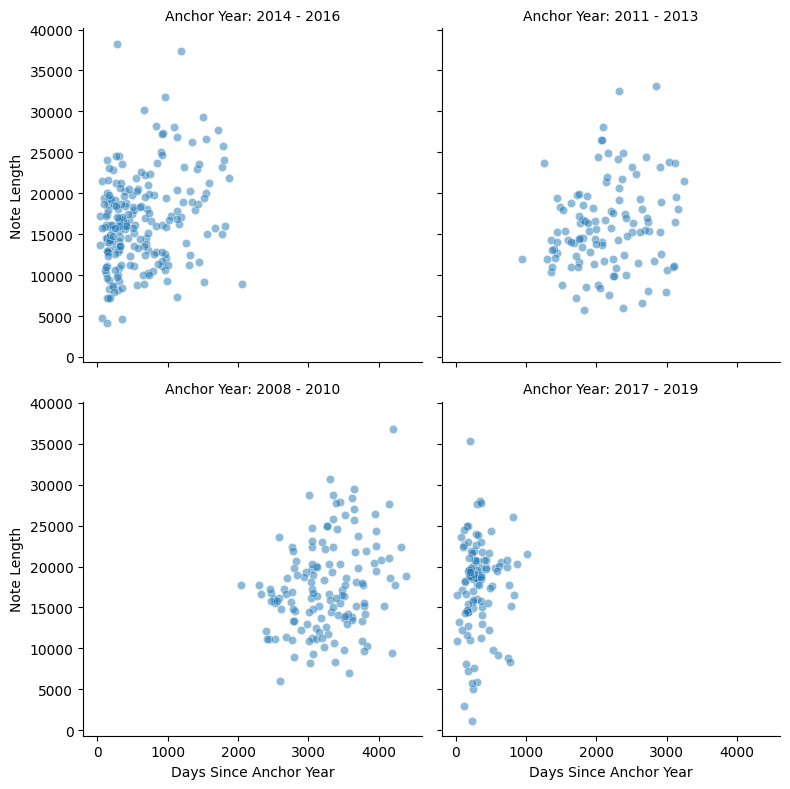

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a FacetGrid to generate separate scatter plots for each anchor_year
g = sns.FacetGrid(df_multiple_notes, col="anchor_year_group", col_wrap=2, height=4, sharex=True, sharey=True)

# Step 2: Map scatterplot onto each subplot
g.map_dataframe(sns.scatterplot, x="days_since_anchor", y="note_length", alpha=0.5)

# Step 3: Customize plot labels and layout
g.set_axis_labels("Days Since Anchor Year", "Note Length")
g.set_titles(col_template="Anchor Year: {col_name}")

# Step 4: Display the plots
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


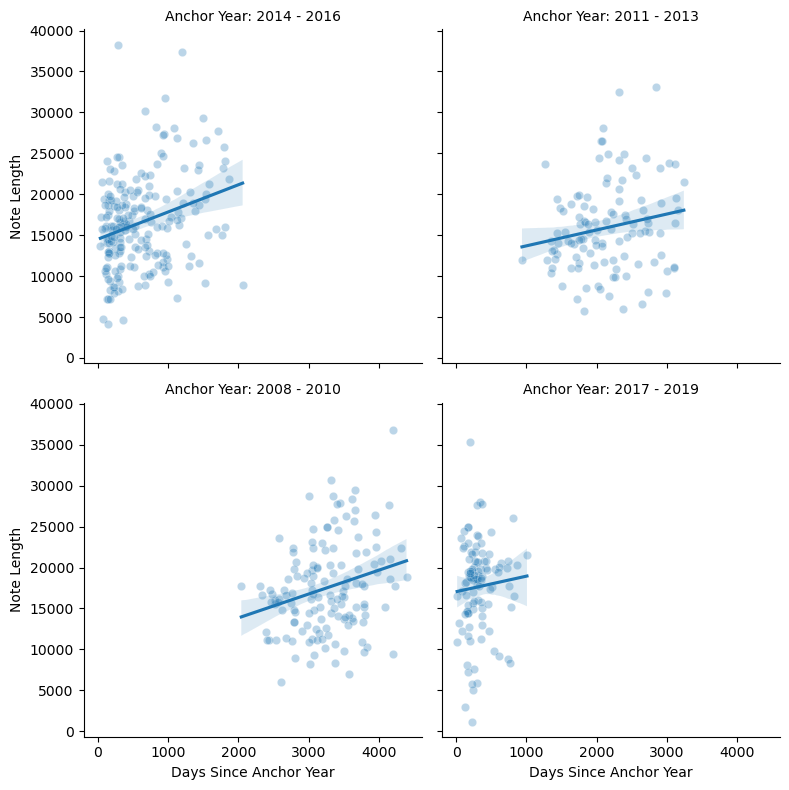

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Function to compute linear regression and add annotations
def plot_with_regression(data, color, **kwargs):
    # Ensure no NaN values
    data = data.dropna(subset=["days_since_anchor", "note_length"])
    
    # Compute linear regression
    slope, intercept, r_value, _, _ = stats.linregress(data["days_since_anchor"], data["note_length"])
    r_squared = r_value ** 2  # Compute R²
    
    # Plot scatter points
    sns.scatterplot(data=data, x="days_since_anchor", y="note_length", alpha=0.3, **kwargs)
    
    # Plot best-fit line
    sns.regplot(data=data, x="days_since_anchor", y="note_length", scatter=False, color=color, line_kws={"label": f"y={slope:.2f}x + {intercept:.2f}\nR²={r_squared:.3f}"})
    
    # Add legend with regression details
    plt.legend()

# Create FacetGrid for multiple plots
g = sns.FacetGrid(df_multiple_notes, col="anchor_year_group", col_wrap=2, height=4, sharex=True, sharey=True)

# Map the custom function to each subplot
g.map_dataframe(plot_with_regression)

# Set labels and titles
g.set_axis_labels("Days Since Anchor Year", "Note Length")
g.set_titles(col_template="Anchor Year: {col_name}")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Function to compute correlation per patient
def compute_correlation(patient_df):
    if len(patient_df) < 2:  # Need at least 2 points for correlation
        return np.nan
    corr, _ = pearsonr(patient_df["days_since_anchor"], patient_df["note_length"])
    return corr

# Compute correlation per patient
correlation_per_patient = df_multiple_notes.groupby("subject_id").apply(compute_correlation).dropna()

# Summarize results
summary = {
    "Total Patients": len(correlation_per_patient),
    "Patients with Negative Correlation": (correlation_per_patient < 0).sum(),
    "Patients with Positive Correlation": (correlation_per_patient > 0).sum(),
    "Mean Correlation": correlation_per_patient.mean(),
    "Median Correlation": correlation_per_patient.median()
}

# Display summary
print(summary)

{'Total Patients': 227, 'Patients with Negative Correlation': 74, 'Patients with Positive Correlation': 153, 'Mean Correlation': 0.32554701428987715, 'Median Correlation': 0.9692328277807171}


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Function to compute correlation per patient
def compute_correlation(patient_df):
    if len(patient_df) < 2:  # Need at least 2 points for correlation
        return np.nan
    corr, _ = pearsonr(patient_df["days_since_anchor"], patient_df["note_length"])
    return corr

# Compute correlation per patient
correlation_per_patient = df_multiple_notes.groupby(["subject_id", "anchor_year_group"]).apply(compute_correlation).dropna()

# Convert to DataFrame
correlation_df = correlation_per_patient.reset_index(name="correlation")

# Summarize per anchor_year_group
summary_per_year = correlation_df.groupby("anchor_year_group")["correlation"].agg(
    Total_Patients="count",
    Patients_Negative_Correlation=lambda x: (x < 0).sum(),
    Patients_Positive_Correlation=lambda x: (x > 0).sum(),
    Mean_Correlation="mean",
    Median_Correlation="median"
).reset_index()

# Display summary
print(pd.DataFrame(summary_per_year).head())


  anchor_year_group  Total_Patients  Patients_Negative_Correlation  \
0       2008 - 2010              54                             21   
1       2011 - 2013              43                              9   
2       2014 - 2016              82                             31   
3       2017 - 2019              48                             13   

   Patients_Positive_Correlation  Mean_Correlation  Median_Correlation  
0                             33          0.199536            0.706081  
1                             34          0.500079            1.000000  
2                             51          0.273159            1.000000  
3                             35          0.400453            1.000000  


## (a) Specificity. 
Clinical notes vary considerably in their level of detail and thoroughness. A provider may include more detail to provide context for a patient to read. Alternatively, they may omit details to avoid confusing or upsetting the patient. To test our hypothesis of how OpenNotes impacted the specificity of the text, we use the following language measures: 1) Note length. Increased note length may be associated with additional details, and previous studies found that the length of Oncology progress notes increased34. We will automatically remove Copy-Forward portions of notes45. We will use the Evaluate Metric Python library46 from Hugging Face to identify (close to) exact matches with a probability threshold of 0.8, where 1 means the two texts are identical. Additionally, we will measure the length of each note section separately in our analysis (e.g. subjective, objective assessment, plan). 2) Novelty. Notes that contain information similar to prior notes (e.g. copy-forward) may contain fewer details of the clinical encounter. Redundancy will be measured by finding duplicated text across records. We will measure new information through the variation in words in a note, using Shannon entropy, compared to average variations between subsequent patient encounters.

In [ ]:
#!pip install evaluate

In [24]:
df_multiple_notes.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category,gender,anchor_age,anchor_year,anchor_year_group,dod,note_id,note_type,note_seq,charttime,storetime,text,note_length,anchor_date,days_since_anchor
85,10070024,26398294,1,F3189,10,Bipolar Disorder,F,23,2142,2014 - 2016,NaN,10070024-DS-14,DS,14.0,2145-02-09,2145-02-09 11:46:00,\nName: ___ Unit No: ___...,17868,2142-01-01,1135
86,10070024,26769931,1,F323,10,Major Depression,F,23,2142,2014 - 2016,NaN,10070024-DS-13,DS,13.0,2145-01-29,2145-01-29 09:59:00,\nName: ___ Unit No: ___...,20409,2142-01-01,1124
102,10080985,24679803,1,F332,10,Major Depression,F,22,2179,2014 - 2016,NaN,10080985-DS-16,DS,16.0,2179-05-13,2179-05-13 15:28:00,\nName: ___ Unit No: ___...,14035,2179-01-01,132
103,10080985,26523165,1,F329,10,Major Depression,F,22,2179,2014 - 2016,NaN,10080985-DS-15,DS,15.0,2179-05-11,2180-08-14 18:55:00,\nName: ___ Unit No: ___...,7168,2179-01-01,130
261,10266157,23371010,1,F332,10,Major Depression,F,76,2194,2011 - 2013,NaN,10266157-DS-23,DS,23.0,2198-11-01,2198-11-01 14:42:00,\nName: ___ Unit No: ___\...,16380,2194-01-01,1765


In [ ]:
#!pip install -U spacy

In [ ]:
#!conda install -y numpy h5py  # resolve package conflict

In [32]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 12.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [35]:
import difflib

def split_into_sentences(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents if sent.text.strip()]

def remove_copied_chunks(curr_note, prev_note, threshold=0.8):
    if not prev_note:
        return curr_note

    curr_sentences = split_into_sentences(curr_note)
    prev_sentences = split_into_sentences(prev_note)

    filtered_sentences = []
    for curr_sent in curr_sentences:
        max_similarity = max(
            [difflib.SequenceMatcher(None, curr_sent, prev_sent).ratio()
             for prev_sent in prev_sentences],
            default=0
        )
        if max_similarity < threshold:
            filtered_sentences.append(curr_sent)

    return " ".join(filtered_sentences)



In [ ]:
def remove_copied_per_patient(notes_series, threshold=0.8):
    cleaned_notes = []  # List to store the cleaned notes
    prev_note = ""  # Initialize previous note to be empty initially
    
    # Loop through each note (current note) in the notes_series for the patient
    for curr_note in notes_series:
        # Compare the current note to the previous note using the remove_copied_chunks function
        cleaned = remove_copied_chunks(curr_note, prev_note, threshold)
        
        # Add the cleaned (non-copy-forward) version of the current note to the list
        cleaned_notes.append(cleaned)
        
        # Update prev_note to be the current note, so it can be compared in the next iteration
        prev_note = curr_note
    
    return cleaned_notes  # Return the cleaned notes for the patient


In [37]:
sample_subjects = (
    df_multiple_notes['subject_id']
    .value_counts()
    .loc[lambda x: x > 1]   # only subjects with >1 note
    .head(2)                # take 2 such subjects
    .index
)

df_sample = df_multiple_notes[df_multiple_notes['subject_id'].isin(sample_subjects)].copy()

# Convert storetime to datetime and sort
df_sample['storetime'] = pd.to_datetime(df_sample['storetime'])
df_sample = df_sample.sort_values(by=["subject_id", "storetime"])

# Apply copy-forward removal
df_sample["cleaned_note_text"] = df_sample.groupby("subject_id")["text"].transform(
    lambda notes: remove_copied_per_patient(notes, threshold=0.8)
)

# Display result
df_sample[["subject_id", "storetime", "text", "cleaned_note_text"]]

,subject_id,storetime,text,cleaned_note_text
4422,14873634,2161-05-13 19:29:00,\nName: ___ Unit No: ___...,\nName: ___ Unit No: ___...
4421,14873634,2161-05-20 11:22:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""My group home didn't think ..."
4420,14873634,2161-05-25 16:06:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""I don't remember what happe..."
4419,14873634,2161-05-27 13:39:00,\nName: ___ Unit No: ___...,Chief Complaint:\nPsychosis/Depression\n \nMaj...
4425,14873634,2161-05-28 11:24:00,\nName: ___ Unit No: ___...,Chief Complaint:\nAdmission for chemotherapy a...
4418,14873634,2162-06-15 15:32:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""My doctor wanted to use ste..."
4423,14873634,2163-04-27 22:08:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""I slapped a girl."" Major Su..."
4417,14873634,2163-05-13 10:29:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""I'm feeling a little restle..."
4426,14873634,2163-06-03 03:08:00,\nName: ___ Unit No: ___...,"Chief Complaint:\n""I'm not that great."" Major ..."
5538,16036071,2142-01-23 13:23:00,\nName: ___ Unit No: ___...,\nName: ___ Unit No: ___...


In [38]:
# Convert 'storetime' to datetime format
df_multiple_notes['storetime'] = pd.to_datetime(df_multiple_notes['storetime'])

# Sort the DataFrame by 'subject_id' and 'storetime'
df_multiple_notes = df_multiple_notes.sort_values(by=["subject_id", "storetime"])

# Apply the remove_copied_per_patient function on the grouped DataFrame
df_multiple_notes["cleaned_note_text"] = df_multiple_notes.groupby("subject_id")["text"].transform(
    lambda notes: remove_copied_per_patient(notes, threshold=0.8)
)

/var/folders/pc/mc5drrzd1875crsj_cnkc0b80000gn/T/ipykernel_29325/3405842162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple_notes['storetime'] = pd.to_datetime(df_multiple_notes['storetime'])


In [40]:
df_multiple_notes.head(2)

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category,gender,anchor_age,anchor_year,anchor_year_group,...,note_id,note_type,note_seq,charttime,storetime,text,note_length,anchor_date,days_since_anchor,cleaned_note_text
86,10070024,26769931,1,F323,10,Major Depression,F,23,2142,2014 - 2016,...,10070024-DS-13,DS,13.0,2145-01-29,2145-01-29 09:59:00,\nName: ___ Unit No: ___...,20409,2142-01-01,1124,\nName: ___ Unit No: ___...
85,10070024,26398294,1,F3189,10,Bipolar Disorder,F,23,2142,2014 - 2016,...,10070024-DS-14,DS,14.0,2145-02-09,2145-02-09 11:46:00,\nName: ___ Unit No: ___...,17868,2142-01-01,1135,"Chief Complaint:\n""I made a mistake. ""\n \nMaj..."


In [39]:
df_multiple_notes.to_csv("cleaned_notes.csv", index=False)


In [52]:
df_multiple_notes.iloc[0, :]

subject_id                                                     10070024
hadm_id                                                        26769931
seq_num                                                               1
icd_code                                                           F323
icd_version                                                          10
diagnosis_category                                     Major Depression
gender                                                                F
anchor_age                                                           23
anchor_year                                                        2142
anchor_year_group                                           2014 - 2016
dod                                                                 NaN
note_id                                                  10070024-DS-13
note_type                                                            DS
note_seq                                                        

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute note length
df_multiple_notes["note_length"] = df_multiple_notes["cleaned_note_text"].str.len()
# word count
df_multiple_notes["word_count"] = df_multiple_notes["cleaned_note_text"].apply(lambda x: len(x.split()))

# Group and filter: Keep only patients with ≥3 notes
grouped = df_multiple_notes.groupby("subject_id")
valid_groups = grouped.filter(lambda x: len(x) >= 3)

# Remove baseline (first note per patient)
def drop_baseline(group):
    return group.iloc[1:]

valid_groups_no_baseline = valid_groups.groupby("subject_id").apply(drop_baseline).reset_index(drop=True)



In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np

positive_trend = 0
negative_trend = 0
no_trend = 0  # Optional: for patients with flat or undefined trends

for subject_id, group in valid_groups_no_baseline.groupby("subject_id"):
    group = group.sort_values("storetime").copy()
    time_start = group["storetime"].iloc[0]
    group["days_since_start"] = (group["storetime"] - time_start).dt.days

    X = group["days_since_start"].values.reshape(-1, 1)
    y = group["note_length"].values

    if len(X) >= 2:
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        
        if slope > 0:
            positive_trend += 1
        elif slope < 0:
            negative_trend += 1
        else:
            no_trend += 1
    else:
        no_trend += 1

print(f"Patients with increasing note length: {positive_trend}")
print(f"Patients with decreasing note length: {negative_trend}")
print(f"Patients with no/flat trend: {no_trend}")


Patients with increasing note length: 39
Patients with decreasing note length: 27
Patients with no/flat trend: 0


In [49]:
# Novelty via Shannon entropy
import math
from collections import Counter

def compute_entropy(text):
    words = text.lower().split()
    total_words = len(words)
    if total_words == 0:
        return 0.0
    word_counts = Counter(words)
    probs = [count / total_words for count in word_counts.values()]
    entropy = -sum(p * math.log2(p) for p in probs)
    return entropy


In [50]:
entropy_records = []

# We'll work on the notes excluding the first one per patient
for subject_id, group in df_multiple_notes.groupby("subject_id"):
    group = group.sort_values("storetime").copy()
    
    if len(group) < 2:
        continue  # need at least 2 notes

    entropies = group["cleaned_note_text"].apply(compute_entropy).tolist()
    
    for i in range(1, len(entropies)):  # skip baseline
        curr_entropy = entropies[i]
        prev_entropy = entropies[i - 1]
        delta_entropy = curr_entropy - prev_entropy

        entropy_records.append({
            "subject_id": subject_id,
            "note_index": i,
            "storetime": group.iloc[i]["storetime"],
            "entropy": curr_entropy,
            "entropy_diff_from_previous": delta_entropy,
        })

df_entropy = pd.DataFrame(entropy_records)

# Optional: summarize trends
print("Average entropy:", df_entropy["entropy"].mean())
print("Average change from previous note:", df_entropy["entropy_diff_from_previous"].mean())


Average entropy: 8.909598168636803
Average change from previous note: -0.017437615855062188


In [51]:
df_multiple_notes["original_length"] = df_multiple_notes["text"].str.split().apply(len)
df_multiple_notes["cleaned_length"] = df_multiple_notes["cleaned_note_text"].str.split().apply(len)

df_multiple_notes["length_diff"] = df_multiple_notes["original_length"] - df_multiple_notes["cleaned_length"]

# Mean difference
mean_diff = df_multiple_notes["length_diff"].mean()
print(f"Average number of words removed per note: {mean_diff:.2f}")

# % change
df_multiple_notes["pct_removed"] = df_multiple_notes["length_diff"] / df_multiple_notes["original_length"]
mean_pct = df_multiple_notes["pct_removed"].mean() * 100
print(f"Average % of words removed per note: {mean_pct:.2f}%")

# Optional: see range
print("\nLength difference (min, max):", df_multiple_notes["length_diff"].min(), df_multiple_notes["length_diff"].max())


Average number of words removed per note: 219.55
Average % of words removed per note: 8.40%

Length difference (min, max): 0 3355
